In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,MaxPooling2D,Conv2D,Dropout,Activation,BatchNormalization
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import warnings 
warnings.filterwarnings('ignore')

In [2]:


df = pd.read_csv(r"C:\Users\haral\Downloads\archive (10)\age_gender.csv")
df = shuffle(df)
df.head()

,age,ethnicity,gender,img_name,pixels
9960,29,3,1,20170104222730103.jpg.chip.jpg,14 15 17 14 7 1 1 2 5 8 10 7 20 42 58 71 79 88...
844,1,3,1,20161220143313302.jpg.chip.jpg,83 115 133 136 145 155 155 163 151 141 146 154...
21154,63,0,0,20170117162837819.jpg.chip.jpg,189 189 189 183 182 193 226 208 205 213 217 21...
22082,70,3,1,20170119150943854.jpg.chip.jpg,79 69 44 158 210 231 202 138 164 214 227 228 2...
4654,24,3,1,20170119164716909.jpg.chip.jpg,29 64 119 76 122 159 88 65 59 44 30 63 82 88 1...


In [3]:
num_pixels = len(df['pixels'][0].split(" "))
img_height = int(np.sqrt(len(df['pixels'][0].split(" "))))
img_width = int(np.sqrt(len(df['pixels'][0].split(" "))))
print(num_pixels, img_height, img_width)

2304 48 48


In [4]:
df['pixels'] = df['pixels'].apply(lambda x: np.array(x.split(),dtype='float32'))

In [5]:
X = np.array(df['pixels'].tolist())
X = np.reshape(X, (-1, 48, 48,1))
y = df['gender']
X_train_gender, X_test_gender, y_train_gender, y_test_gender = train_test_split(X, y, test_size=0.3, random_state=44)

In [8]:
train_datagen=ImageDataGenerator(rescale=1/255)
train_generator_gender=train_datagen.flow(
    X_train_gender ,y_train_gender ,batch_size=32 
)

test_datagen=ImageDataGenerator(rescale=1/255)
test_generator_gender=test_datagen.flow(
    X_test_gender ,y_test_gender ,batch_size=32 
 
)

In [9]:
train_generator_gender =train_datagen.flow(
    X_train_gender ,y_train_gender ,batch_size=32
)

test_generator_gender =test_datagen.flow(
    X_test_gender ,y_test_gender ,batch_size=32
)

In [10]:
earlystop=EarlyStopping(patience=6)
learning_rate_reduction=ReduceLROnPlateau(
    monitor='val_acc',
    patience= 3,
    verbose=1,
)
callbacks = [earlystop, learning_rate_reduction]

In [11]:
y = df['ethnicity']
X_train_ethnicity, X_test_ethnicity, y_train_ethnicity, y_test_ethnicity = train_test_split(X, y, test_size=0.3, random_state=44)

In [12]:
model_gender = Sequential()

model_gender.add(Conv2D(32,(3,3),activation='relu',input_shape=(48,48,1)))
model_gender.add(MaxPooling2D(2,2))

model_gender.add(Conv2D(64,(3,3),activation='relu'))
model_gender.add(MaxPooling2D(2,2))

model_gender.add(Conv2D(64,(3,3),activation='relu'))
model_gender.add(MaxPooling2D(2,2))

model_gender.add(Flatten())
model_gender.add(Dense(1,activation='sigmoid'))

model_gender.compile(optimizer='SGD' ,loss='BinaryCrossentropy',metrics=['accuracy'])

model_gender.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

In [18]:
history=model_gender.fit(
    train_generator_gender, 
    epochs= 20,
    validation_data= test_generator_gender,
    callbacks= callbacks
)

Epoch 1/20
519/519 [==============================] - 21s 40ms/step - loss: 0.3169 - accuracy: 0.8620 - val_loss: 0.3309 - val_accuracy: 0.8525 - lr: 0.0100
Epoch 2/20
519/519 [==============================] - 21s 40ms/step - loss: 0.3109 - accuracy: 0.8657 - val_loss: 0.3357 - val_accuracy: 0.8570 - lr: 0.0100
Epoch 3/20
519/519 [==============================] - 21s 41ms/step - loss: 0.3084 - accuracy: 0.8675 - val_loss: 0.3241 - val_accuracy: 0.8583 - lr: 0.0100
Epoch 4/20
519/519 [==============================] - 21s 41ms/step - loss: 0.3019 - accuracy: 0.8696 - val_loss: 0.3355 - val_accuracy: 0.8518 - lr: 0.0100
Epoch 5/20
519/519 [==============================] - 21s 41ms/step - loss: 0.2987 - accuracy: 0.8716 - val_loss: 0.3242 - val_accuracy: 0.8608 - lr: 0.0100
Epoch 6/20
519/519 [==============================] - 21s 41ms/step - loss: 0.2935 - accuracy: 0.8746 - val_loss: 0.3219 - val_accuracy: 0.8623 - lr: 0.0100
Epoch 7/20
519/519 [==============================] - 21s 

In [19]:
acc=model_gender.evaluate(test_generator_gender)

223/223 [==============================] - 2s 11ms/step - loss: 0.3262 - accuracy: 0.8640


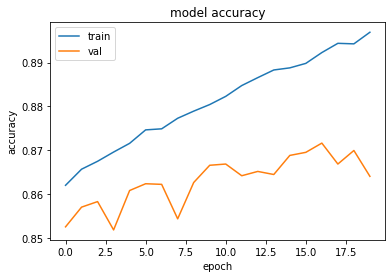

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

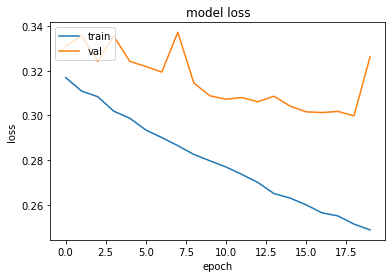

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()